## ESA CCI Open Data Portal access using xcube

This notebook shows how to open data cubes from the ESA CCI Open Data Portal for a given time range and region:

1. A **temporarily regular cube** with aggregated CCI data that fall into equal-size time periods;

To run this Notebook, make sure the ESA CCI ODP / xcube Integration is setup correctly, see [Ex0-DCFS-Setup](./Ex0-DCFS-Setup.ipynb).

In [1]:
# xcube_cci imports
from xcube_cci.cube import open_cube
from xcube_cci.config import CubeConfig
from xcube_cci.observers import Observers

# xcube imports
from xcube.core.maskset import MaskSet
from xcube.core.geom import mask_dataset_by_geometry
from xcube.core.geom import clip_dataset_by_geometry

# Various utilities
import json
import xarray as xr
import shapely.geometry
import IPython.display
import zarr

In [2]:
%matplotlib inline
import nest_asyncio
nest_asyncio.apply()

---
For this demo, we are focussing on Central Europe.

In [3]:
x1 = -5.40  # degree
y1 = 42.40  # degree
x2 = 30.40  # degree
y2 = 58.40  # degree

bbox = x1, y1, x2, y2

Visualize the bounding box. If you don't see anything, please refer to [Ex0-DCFS-Setup](./Ex0-DCFS-Setup.ipynb).

In [4]:
IPython.display.GeoJSON(shapely.geometry.box(*bbox).__geo_interface__)

<IPython.display.GeoJSON object>

Our time range covers data from 1997: 1997-01-01 to 1997-12-01

---
Example (!): ESA CCI dataset with variables:

In [5]:
cube_config = CubeConfig(dataset_name='esacci.OZONE.month.L3.NP.multi-sensor.multi-platform.MERGED.fv0002.r1',
                         variable_names=['surface_pressure', 'O3e_du_tot'],
                         tile_size=[512, 512],
                         geometry=bbox,
                         time_range=['1997-01-01', '1997-12-01']
)

We define a `request_collector` as an observer for Opendata Portal requests made, so we can show usage stats. This is a developer tool, useful for demonstration purposes too. **Otherwise, this is not needed.**

In [6]:
request_collector = Observers.request_collector()

Open a data cube:

In [7]:
cube = open_cube(cube_config, observer=request_collector)

In [8]:
cube

<xarray.Dataset>
Dimensions:           (bnds: 2, lat: 16, lon: 35, time: 12)
Coordinates:
  * lat               (lat) float64 42.5 43.5 44.5 45.5 ... 54.5 55.5 56.5 57.5
  * lon               (lon) float64 -4.5 -3.5 -2.5 -1.5 ... 26.5 27.5 28.5 29.5
  * time              (time) datetime64[ns] 1997-01-16T11:59:59 ... 1997-12-16T11:59:59
    time_bnds         (time, bnds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    O3e_du_tot        (time, lat, lon) float32 dask.array<chunksize=(1, 16, 35), meta=np.ndarray>
    surface_pressure  (time, lat, lon) float32 dask.array<chunksize=(1, 16, 35), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.OZONE.month.L3.NP.multi-sensor.multi-plat...
    history:                 [{'program': 'xcube_cci.store.CciStore', 'cube_c...
    date_created:            2020-04-28T19:17:05.982735
    time_coverage_start:     1997-01-01T00:00:00
    time_coverage_end:       1997-12-31T23:59:59
    time_coverage_duration:  P364DT23H59M59S
    geospatial_lon_min:      -5.4
    geospatial_lat_min:      42.4
    geospatial_lon_max:      30.4
    geospatial_lat_max:      58.4

No requests have been made yet. Requests are made only if data is actually required.

In [10]:
request_collector.stats

Note, the cube's time coordinates are monotonically increasing and the distance between two time steps is varying:

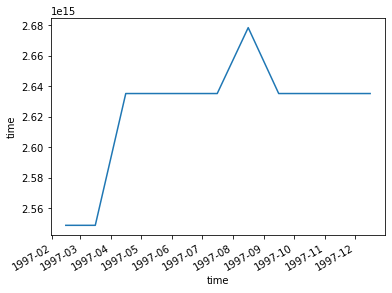

In [11]:
cube.time.diff(dim='time').plot.line()

In [12]:
cube.surface_pressure

<xarray.DataArray 'surface_pressure' (time: 12, lat: 16, lon: 35)>
dask.array<zarr, shape=(12, 16, 35), dtype=float32, chunksize=(1, 16, 35), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 42.5 43.5 44.5 45.5 46.5 ... 53.5 54.5 55.5 56.5 57.5
  * lon      (lon) float64 -4.5 -3.5 -2.5 -1.5 -0.5 ... 25.5 26.5 27.5 28.5 29.5
  * time     (time) datetime64[ns] 1997-01-16T11:59:59 ... 1997-12-16T11:59:59
Attributes:
    standard_name:  surface_air_pressure
    long_name:      Pressure at the bottom of the atmosphere.
    units:          hPa
    fill_value:     NaN
    chunk_sizes:    [1, 180, 360]
    data_type:      Float32
    dimensions:     ['time', 'lat', 'lon']

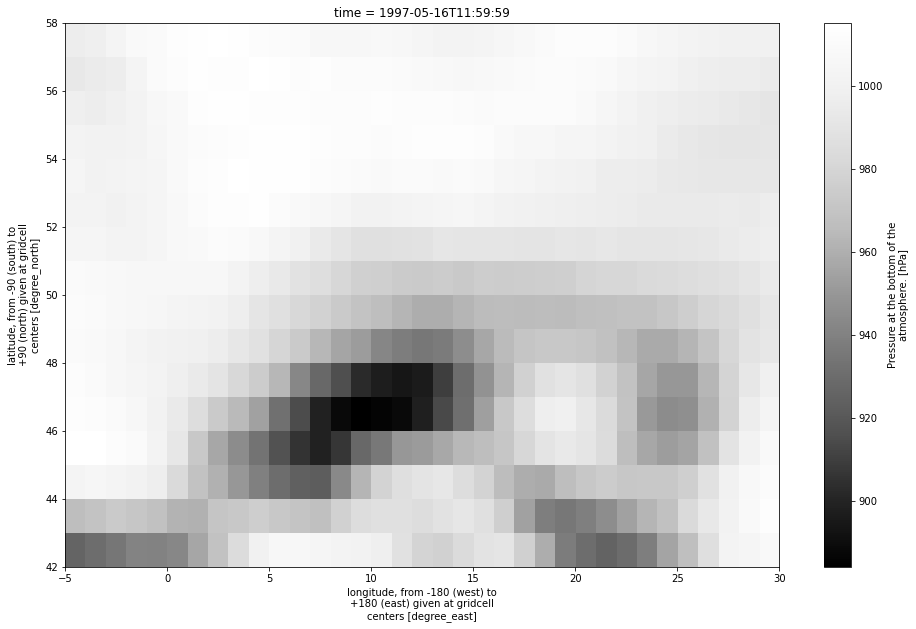

In [14]:
cube.surface_pressure.sel(time='1997-05-01 10:00:00', method='nearest').plot.imshow(cmap='Greys_r', figsize=(16, 10))

Now Open Data Portal requests have been made

In [9]:
request_collector.stats